In [ ]:
from google.colab import drive
import sys
drive.mount('/content/gdrive')
sys.path.append('/content/gdrive/MyDrive/AIM')
!ls -l '/content/gdrive/MyDrive/AIM'
import aim_util

Mounted at /content/gdrive
total 48516
-rw------- 1 root root    1108 May  2 18:51 aim_util.py
-rw------- 1 root root    2696 Apr 15 14:07 citizen_1864_20240414_213308040_groundtruth.txt
-rw------- 1 root root 3663644 Apr 14 21:34 citizen_1864_20240414_213308040.jpg
-rw------- 1 root root    2696 May  2 20:40 citizen_1864_groundtruth_annotated.txt
-rw------- 1 root root    3899 May  3 15:25 citizen_1864_groundtruth_word_list_lower.txt
-rw------- 1 root root    3899 May  3 15:25 citizen_1864_groundtruth_word_list.txt
-rw------- 1 root root    3899 May  3 15:25 citizen_1864_groundtruth_word_string_lower.txt
-rw------- 1 root root    3899 May  3 15:25 citizen_1864_groundtruth_word_string.txt
-rw------- 1 root root 3663644 Apr 23 20:54 citizen_1864_rescan.jpg
-rw------- 1 root root   68979 May  3 15:23 citizen_1864_xform0_carlv_bbox.txt
-rw------- 1 root root    3778 May  3 15:23 citizen_1864_xform0_carlv_word_list.txt
-rw------- 1 root root    2425 May  3 15:23 citizen_1864_xform0_carlv_w

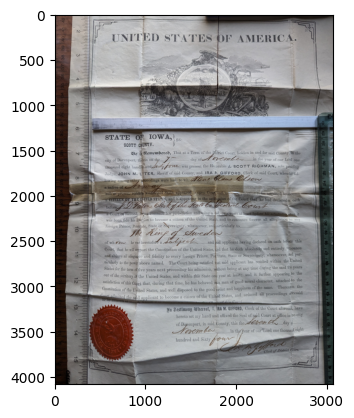

In [ ]:
base_name = 'citizen_1864_xform0'
image_path = '/content/gdrive/MyDrive/AIM/citizen_1864_rescan.jpg'
aim_util.show_image(image_path)

In [ ]:
# Import OpenCV
import cv2
import os
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

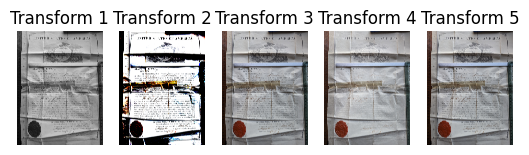

In [ ]:
# Import OpenCV
import cv2

# applying grayscale conversion
def grayscale(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# applying thresholding
def threshold(img, thresh_val=127):
    ret, thresh = cv2.threshold(img, thresh_val, 255, cv2.THRESH_BINARY)
    return thresh

# applying noise reduction using Gaussian Blur
def noise_reduction(img, kernel_size=5):
    blurred = cv2.GaussianBlur(img, (kernel_size, kernel_size), 0)
    return blurred

# applying sharpening using Laplacian operator
def sharpen(img, kernel_size=3):
    sharpened = cv2.Laplacian(img, cv2.CV_8U, ksize=kernel_size)
    sharpened = cv2.add(img, sharpened, 1.0)
    return sharpened

# adjusting contrast and brightness
def contrast_and_brightness(img, contrast_factor=1.0, brightness_factor=0):
    contrast_adjusted = img * contrast_factor
    brightness_adjusted = contrast_adjusted + brightness_factor
    return np.clip(brightness_adjusted, 0, 255)


# read image
img = mpimg.imread(image_path)

# Perform the image transformations
gray_img = grayscale(img)
thresh_img = threshold(img)
noise_reduced_img = noise_reduction(img)
sharpened_img = sharpen(img)
adjusted_img = contrast_and_brightness(img, 1, 0)

# save the transformed images
gdrive_path = '/content/gdrive/MyDrive/AIM/'
cv2.imwrite(os.path.join(gdrive_path , 'citizen_xform1.jpg'), gray_img)
cv2.imwrite(os.path.join(gdrive_path , 'citizen_xform2.jpg'), thresh_img)
cv2.imwrite(os.path.join(gdrive_path , 'citizen_xform3.jpg'), noise_reduced_img)
cv2.imwrite(os.path.join(gdrive_path , 'citizen_xform4.jpg'), sharpened_img)
cv2.imwrite(os.path.join(gdrive_path , 'citizen_xform5.jpg'), adjusted_img)

# Create a list to store the transformed images
transformed_images = []

# 1. Grayscale Conversion
transformed_images.append(gray_img)
transformed_images.append(thresh_img)
transformed_images.append(noise_reduced_img)
transformed_images.append(sharpened_img)
transformed_images.append(adjusted_img)


# Display the images side by side
for i in range(0, len(transformed_images)):
    plt.subplot(1, len(transformed_images), i+1)
    plt.title("Transform " + str(i+1))
    plt.imshow(transformed_images[i], cmap='gray')
    plt.axis('off')
    #save_image_name = '/content/gdrive/MyDrive/AIM/citizen_xform_' + str(i) + '.jpg'
    # plt.savefig(save_image_name)
plt.show()

In [ ]:
!ls -l /content/gdrive/MyDrive/AIM/citizen_xform*

-rw------- 1 root root 3890679 May  3 18:33 /content/gdrive/MyDrive/AIM/citizen_xform1.jpg
-rw------- 1 root root 4282849 May  3 18:33 /content/gdrive/MyDrive/AIM/citizen_xform2.jpg
-rw------- 1 root root 2669393 May  3 18:33 /content/gdrive/MyDrive/AIM/citizen_xform3.jpg
-rw------- 1 root root 6732009 May  3 18:33 /content/gdrive/MyDrive/AIM/citizen_xform4.jpg
-rw------- 1 root root 4093224 May  3 18:33 /content/gdrive/MyDrive/AIM/citizen_xform5.jpg
-rw------- 1 root root 4093224 Apr 23 21:53 /content/gdrive/MyDrive/AIM/citizen_xform_contrast1.jpg
-rw------- 1 root root 3890679 Apr 23 21:53 /content/gdrive/MyDrive/AIM/citizen_xform_gray1.jpg
-rw------- 1 root root 2669393 Apr 23 21:53 /content/gdrive/MyDrive/AIM/citizen_xform_noise1.jpg
-rw------- 1 root root 6732009 Apr 23 21:53 /content/gdrive/MyDrive/AIM/citizen_xform_sharp1.jpg
-rw------- 1 root root 4282849 Apr 23 21:53 /content/gdrive/MyDrive/AIM/citizen_xform_threshold1.jpg


# **grayscale**

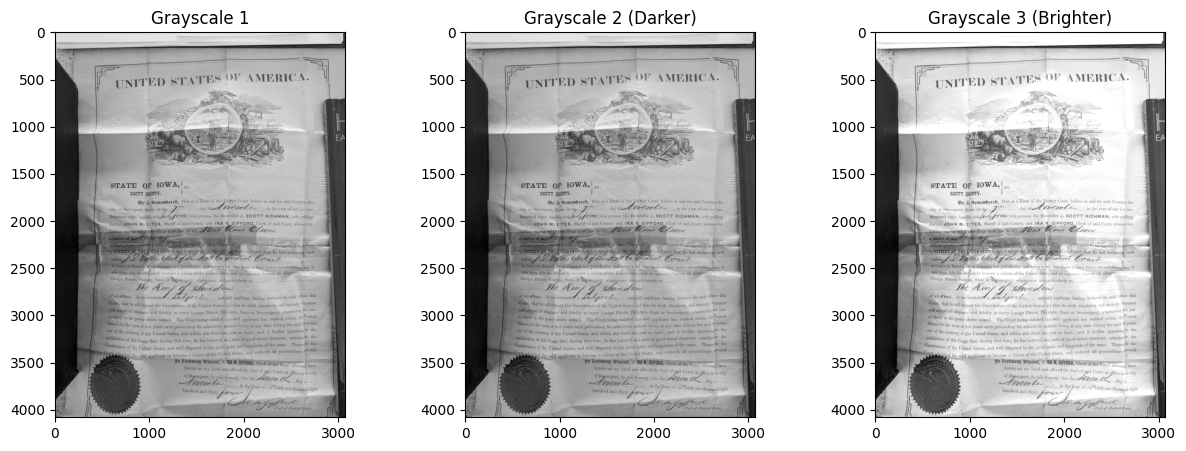

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Your grayscale function
def grayscale(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Load an image
image = img
#image = cv2.imread('your_image.jpg')  # Replace 'your_image.jpg' with your image file

# Apply grayscale multiple times with varying intensity
result1 = grayscale(image)
result2 = cv2.multiply(grayscale(image), 0.7)  # Slightly darker
result3 = cv2.multiply(grayscale(image), 1.3)  # Slightly brighter

# Display images side-by-side
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))  # Adjust figsize if needed

axes[0].imshow(result1, cmap='gray')
axes[0].set_title('Grayscale 1')

axes[1].imshow(result2, cmap='gray')
axes[1].set_title('Grayscale 2 (Darker)')

axes[2].imshow(result3, cmap='gray')
axes[2].set_title('Grayscale 3 (Brighter)')

plt.show()

# **contrast_and_brightness**

In [ ]:
# contrast_and_brightness

In [ ]:
plt.imshow(adjusted_img, cmap='gray')  # Assuming a grayscale image
plt.show()

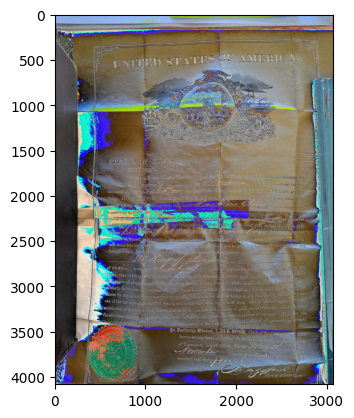

In [ ]:
# # Function for adjusting contrast and brightness
# def contrast_and_brightness(img, contrast_factor=1.5, brightness_factor=50):
#     contrast_adjusted = img * contrast_factor
#     brightness_adjusted = contrast_adjusted + brightness_factor
#     return np.clip(brightness_adjusted, 0, 255)

# contrast_and_brightness(img, contrast_factor=1.0, brightness_factor=0)

adj1_img = contrast_and_brightness(img, 2, 8)
show_image(adj1_img)

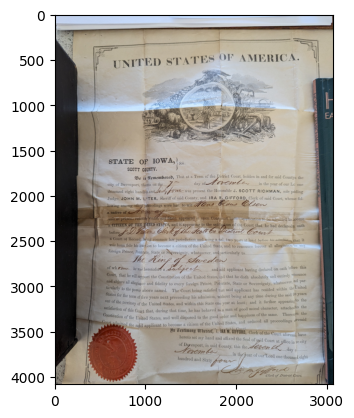

In [ ]:
show_image(img)

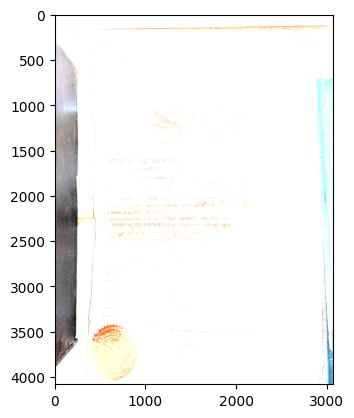

In [ ]:
def contrast_and_brightness(img, contrast_factor=1.5, brightness_factor=50):
    img_float = img.astype(np.float32)
    contrast_adjusted = np.clip(img_float * contrast_factor, 0, 255)
    brightness_adjusted = np.clip(contrast_adjusted + brightness_factor, 0, 255)
    return brightness_adjusted.astype(np.uint8)

adj_img = contrast_and_brightness(img, 5.0, 25)
show_image(adj_img)